In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Mohr-Smith_2017_Completa.csv to Mohr-Smith_2017_Completa.csv


In [0]:
# Importing the dataset
import io

df0= pd.read_csv(io.BytesIO(uploaded['Mohr-Smith_2017_Completa.csv']))

"""
La columna Target es donde vamos a guardar la informacion de la clasificacion
"""
df0['Target']=999

In [0]:
"""
Elegimos las columnas del archivo con las que vamos a trabajar
"""
column_names=['EM', 'SUB', 'LUM','Target','VPHAS-OB1', 'umag', 'gmag', 'rmag', 'Hamag', 'imag', 'Jmag', 'Hmag', 'Kmag']
#column_names=['EM', 'SUB', 'LUM','Target','VPHAS-OB1', 'umag', 'gmag', 'rmag', 'Hamag', 'imag']

df= df0[column_names]

"""Elimino las filas que tienen valores NaN"""
df= df.dropna(subset=column_names)

In [0]:
"""
Armo la clasificacion:

        Estrellas con emision      -> EM = 1
        Estrellas Subluminosas     -> SUB = 1
        Estrellas Sobreluminosas   -> LUM = 1
"""

mask_EM= (df['EM'] == 1)
mask_SUB= (df['SUB'] == 1)
mask_LUM= (df['LUM'] == 1)

mask_OB_nor= (~mask_EM & ~mask_SUB & ~mask_LUM)
mask_OB_EM= (mask_EM & ~mask_SUB & ~mask_LUM)
mask_OB_SUB= (~mask_EM & mask_SUB & ~mask_LUM)
mask_OB_LUM= (~mask_EM & ~mask_SUB & mask_LUM)

df['Target']=np.nan
df['Target'][mask_OB_nor]=111
df['Target'][mask_OB_EM]=222
df['Target'][mask_OB_SUB]=333
df['Target'][mask_OB_LUM]=444
df= df.dropna(subset=column_names)

dic= {'111': 'OB', '222': 'EM', '333': 'SUB', '444': 'LUM'}

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be s

In [0]:
"""Armo los indices de color (todos con todos)"""

cols= df.columns.tolist()
i= cols.index('umag')
cols= df[df.columns[i:]].columns.tolist()

for i,c in enumerate(cols[:-1]):
    for cc in cols[i+1:]:
        df[c + '-' + cc]= df[c] - df[cc]
        
#cols= df.columns.tolist()        
#ii= cols.index(c + '-' + cc)   


In [0]:
#archivo_test = 'Be_vega'
#archivo_test = 'ngc663_IPHAS_SDSS'

#archivo_test_1 = 'NGC6649-VPHAS'
#df1=pd.read_csv(archivo_test_1 + '.csv')

#archivo_test_2 = 'NGC6611-VPHAS'
#df2=pd.read_csv(archivo_test_2 + '.csv')

#archivo_test_3 = 'Be_NGC6649-VPHAS'
#df3=pd.read_csv(archivo_test_3 + '.csv')

#df3.rename(columns={'_RA':'_RAJ2000'}, inplace=True)
#df3.rename(columns={'_DEC':'_DEJ2000'}, inplace=True)

#archivo_test_4 = 'Be_NGC6611-VPHAS'
#df4=pd.read_csv(archivo_test_4 + '.csv')

#df4.rename(columns={'_RA':'_RAJ2000'}, inplace=True)
#df4.rename(columns={'_DEC':'_DEJ2000'}, inplace=True)

#archivo_test_5 = 'Be_CoRoT-SDSS-IPHAS'
#df5=pd.read_csv(archivo_test_5 + '.csv')

#df5.rename(columns={'ha':'Hamag'}, inplace=True)
#df5.rename(columns={'_RA_1':'_RAJ2000'}, inplace=True)
#df5.rename(columns={'_DEC_1':'_DEJ2000'}, inplace=True)

#archivo_test_6 = 'NGC663-IPHAS-SDSS'
#df6=pd.read_csv(archivo_test_6 + '.csv')

#df6.rename(columns={'ha':'Hamag'}, inplace=True)

#archivo_test_7 = 'Be_Granada-IPHAS-SDSS'
#df7=pd.read_csv(archivo_test_7 + '.csv')

#df7.rename(columns={'_RAJ2000_tab1':'_RAJ2000'}, inplace=True)
#df7.rename(columns={'_DEJ2000_tab1':'_DEJ2000'}, inplace=True)
#df7.rename(columns={'r_tab1':'rmag'}, inplace=True)
#df7.rename(columns={'i_tab1':'imag'}, inplace=True)
#df7.rename(columns={'ha_tab1':'Hamag'}, inplace=True)

#archivo_test_8 = 'Be_JPLUS_vega'
#df8=pd.read_csv(archivo_test_8 + '.csv')

#archivo_test_9 = 'Catalogue_of_Be_stars-Jaschek1982-VPHAS'
#df9=pd.read_csv(archivo_test_9 + '.csv')

uploaded = files.upload()
archivo_test_10 = 'NGC3766-VPHAS-2MASS'
df10=pd.read_csv(io.BytesIO(uploaded[archivo_test_10 + '.csv']))


Saving NGC3766-VPHAS-2MASS.csv to NGC3766-VPHAS-2MASS.csv


In [0]:
"""Reemplazo los valores malos por NaN"""
#df1= df1.replace(99,np.NaN)
"""
Elegimos las columnas del archivo con las que vamos a trabajar
"""
#column_names=['EM', 'SUB', 'LUM','Target','VPHAS-OB1', 'umag', 'gmag', 'rmag', 'Hamag', 'imag', 'Jmag', 'Hmag', 'Kmag']
column_names=['_RAJ2000', '_DEJ2000', 'umag', 'gmag', 'rmag', 'Hamag', 'imag', 'Jmag', 'Hmag', 'Kmag']

#df1= df1[column_names]
#df2= df2[column_names]
#df3= df3[column_names]
#df4= df4[column_names]
#df5= df5[column_names]
#df6= df6[column_names]
#df7= df7[column_names]
#df8= df8[column_names]
#df9= df9[column_names]
df10= df10[column_names]

"""Elimino las filas que tienen valores NaN"""
#df1= df1.dropna(subset=column_names)
#df2= df2.dropna(subset=column_names)
#df3= df3.dropna(subset=column_names)
#df4= df4.dropna(subset=column_names)
#df5= df5.dropna(subset=column_names)
#df6= df6.dropna(subset=column_names)
#df7= df7.dropna(subset=column_names)
#df8= df8.dropna(subset=column_names)
#df9= df9.dropna(subset=column_names)
df10= df10.dropna(subset=column_names)


In [0]:
"""
Paso las magnitudes del SDSS del sistema AB al VEGA

m_AB = m_Vega + offset

      offset
u     0.924
g    -0.094
r     0.174
Ha    0.338
i     0.378
"""

#for c in column_names[2:]:
#    df5.rename(columns={c:c+'_AB'}, inplace=True)
#    df6.rename(columns={c:c+'_AB'}, inplace=True)
#    df7.rename(columns={c:c+'_AB'}, inplace=True)

#df5['umag'] = df5['umag_AB'] - 0.924
#df5['gmag'] = df5['gmag_AB'] + 0.094
#df5['rmag'] = df5['rmag_AB'] - 0.174
#df5['imag'] = df5['imag_AB'] - 0.378
#df5['Hamag'] = df5['Hamag_AB'] - 0.338

#df5= df5[column_names]

#df6['umag'] = df6['umag_AB'] - 0.924
#df6['gmag'] = df6['gmag_AB'] + 0.094
#df6['rmag'] = df6['rmag_AB'] - 0.174
#df6['imag'] = df6['imag_AB'] - 0.378
#df6['Hamag'] = df6['Hamag_AB'] - 0.338

#df6= df6[column_names]

#df7['umag'] = df7['umag_AB'] - 0.924
#df7['gmag'] = df7['gmag_AB'] + 0.094
#df7['rmag'] = df7['rmag_AB'] - 0.174
#df7['imag'] = df7['imag_AB'] - 0.378
#df7['Hamag'] = df7['Hamag_AB'] - 0.338

#df7= df7[column_names]


'\nPaso las magnitudes del SDSS del sistema AB al VEGA\n\nm_AB = m_Vega + offset\n\n      offset\nu     0.924\ng    -0.094\nr     0.174\nHa    0.338\ni     0.378\n'

In [0]:
"""Armo los indices de color"""

cols= df10.columns.tolist()
i= cols.index('umag')
cols= df10[df10.columns[i:]].columns.tolist()

for i,c in enumerate(cols[:-1]):
    for cc in cols[i+1:]:
        #df1[c + '-' + cc]= df1[c] - df1[cc]
        #df2[c + '-' + cc]= df2[c] - df2[cc]
        #df3[c + '-' + cc]= df3[c] - df3[cc]
        #df4[c + '-' + cc]= df4[c] - df4[cc]
        #df5[c + '-' + cc]= df5[c] - df5[cc]
        #df6[c + '-' + cc]= df6[c] - df6[cc]
        #df7[c + '-' + cc]= df7[c] - df7[cc]
        #df8[c + '-' + cc]= df8[c] - df8[cc]
        #df9[c + '-' + cc]= df9[c] - df9[cc]
        df10[c + '-' + cc]= df10[c] - df10[cc]


In [0]:
"""
Me quedo con aquellos objetos mas brillantes y que se encuentran en la secuecia de las posibles OB

De Acuerdo a la figura del paper de Mohr-Smith 2017:
""" 
#df1= df1[(df1['gmag'] < 15) & ((df1['umag']-df1['gmag']) < (df1['gmag']-df1['rmag']-0.8))]
OBstars_10= df10[(df10['gmag'] < 20) & ((df10['umag']-df10['gmag']) < (df10['gmag']-df10['rmag']-0.8)) & ((df10['umag']-df10['gmag']) > (df10['gmag']-df10['rmag']-1.7))]

"""
Isochrone	Z = 0.01900		Age = 	7.600e+07 yr
col1= log(age/yr)
col2= M_ini
col3= M_act
col4= logL/Lo
col5= logTe
col6= logG
col7= mbol
col8= u
col9= g
col10= r
col11= i
col12= z
col13= C/O
col14= M_hec
col15= period
col16= pmode
col17= logMdot
col18= int_IMF
"""
#isocrona= np.genfromtxt('7p6e7Av0p00.dat').T

"""
Las estrellas OB tienen temperaturas mayores a 10000 ==> log(Te)= 4
"""

#gmag_0= isocrona[8][isocrona[4] >= 4.0]
#rmag_0= isocrona[9][isocrona[4] >= 4.0]

"""
Enrojezco los colores de la isocrona
"""
# De la info del cumulo tengo
#Av= 1.332 * 3.1 # NGC 6649 E(B-V) = 1.332 (Kharchenko et al., 2016)
#mod_dist= -5. + 5. * np.log10(1564.) # NGC 6649 d= 1564 (Kharchenko et al., 2016)
# luego transformo al sistema rgi
#Ag=1.20585*Av
#Ar=0.87122*Av
#Egr=Av*(1.20585-0.87122)
#Eri=Av*(0.87122-0.68319)
#EBV=Av/3.1

#g_lim_1= gmag_0[0] + Ag + mod_dist
#gr_lim_1= gmag_0[0] - rmag_0[0] + Egr

#OBstars_1= df1[(df1['gmag'] < g_lim_1) & ((df1['umag']-df1['gmag']) < (df1['gmag']-df1['rmag']-0.4))]


# De la info del cumulo tengo
#Av= 0.7 * 3.1 # NGC 6611 E(B-V) = 0.7 (Kharchenko et al., 2005)
#mod_dist= -5. + 5. * np.log10(1719.) # NGC 6611 d= 1719 (Kharchenko et al., 2005)
# luego transformo al sistema rgi
#Ag=1.20585*Av
#Ar=0.87122*Av
#Egr=Av*(1.20585-0.87122)
#Eri=Av*(0.87122-0.68319)
#EBV=Av/3.1

#g_lim_2= gmag_0[0] + Ag + mod_dist
#g_lim_2= 16. # Porque la Be mas debil tienen gmag ~ 15 
#gr_lim_2= gmag_0[0] - rmag_0[0] + Egr

#OBstars_2= df2[(df2['gmag'] < g_lim_2) & ((df2['umag']-df2['gmag']) < (df2['gmag']-df2['rmag']-0.3))]
#OBstars= df1

# De la info del cumulo tengo
#Av= 0.7 * 3.1 # NGC 663 E(B-V) = 0.7 (Kharchenko et al., 2016)
#mod_dist= -5. + 5. * np.log10(2100.) # NGC 663 d= 2100 (Kharchenko et al., 2016)
# luego transformo al sistema rgi
#Ag=1.20585*Av
#Ar=0.87122*Av
#Egr=Av*(1.20585-0.87122)
#Eri=Av*(0.87122-0.68319)
#EBV=Av/3.1

#g_lim_6= gmag_0[0] + Ag + mod_dist
#g_lim_6= 18
#gr_lim_6= gmag_0[0] - rmag_0[0] + Egr

#OBstars_6= df6[(df6['gmag'] < g_lim_6) & ((df6['umag']-df6['gmag']) < (df6['gmag']-df6['rmag']-0.3))]
#OBstars= df1


'\nEnrojezco los colores de la isocrona\n'

In [0]:
#plt.figure()
#plt.scatter(df1['gmag-rmag'], df1['gmag'], s=1., marker= 'o')
#plt.scatter(OBstars['gmag-rmag'], OBstars['gmag'], s=1.5, marker= 'x')
##plt.plot(gmag_0-rmag_0+Egr, gmag_0+Ag+mod_dist)
#plt.xlabel('(g-r)')
#plt.ylabel('g')
#plt.gca().invert_yaxis()
#plt.show()


In [0]:
# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

cols= df.columns.tolist()
i= cols.index('umag')

X_train = df[df.columns[i:]].values
y_train = df['Target']

cols= OBstars_10.columns.tolist()
i= cols.index('umag')

#X_test_1 = OBstars_1[OBstars_1.columns[i:]].values
#X_test_2 = OBstars_2[OBstars_2.columns[i:]].values
#X_test_3 = df3[df3.columns[i:]].values
#X_test_4 = df4[df4.columns[i:]].values
#X_test_5 = df5[df5.columns[i:]].values
#X_test_6 = OBstars_6[OBstars_6.columns[i:]].values
#X_test_7 = df7[df7.columns[i:]].values
#X_test_8 = df8[df8.columns[i:]].values
#X_test_9 = df9[df9.columns[i:]].values
X_test_10 = OBstars_10[OBstars_10.columns[i:]].values

# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_test_1 = sc.transform(X_test_1)
#X_test_2 = sc.transform(X_test_2)
#X_test_3 = sc.transform(X_test_3)
#X_test_4 = sc.transform(X_test_4)
#X_test_5 = sc.transform(X_test_5)
#X_test_6 = sc.transform(X_test_6)
#X_test_7 = sc.transform(X_test_7)
#X_test_8 = sc.transform(X_test_8)
#X_test_9 = sc.transform(X_test_9)
X_test_10 = sc.transform(X_test_10)


In [0]:
# Applying LDA

lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)

#X_test_1 = lda.transform(X_test_1)
#X_test_2 = lda.transform(X_test_2)
#X_test_3 = lda.transform(X_test_3)
#X_test_4 = lda.transform(X_test_4)
#X_test_5 = lda.transform(X_test_5)
#X_test_6 = lda.transform(X_test_6)
#X_test_7 = lda.transform(X_test_7)
#X_test_8 = lda.transform(X_test_8)
#X_test_9 = lda.transform(X_test_9)
X_test_10 = lda.transform(X_test_10)


#resul_1 = pd.DataFrame(data = X_test_1, columns = ['PC 1', 'PC 2'])
#resul_2 = pd.DataFrame(data = X_test_2, columns = ['PC 1', 'PC 2'])
#resul_3 = pd.DataFrame(data = X_test_3, columns = ['PC 1', 'PC 2'])
#resul_4 = pd.DataFrame(data = X_test_4, columns = ['PC 1', 'PC 2'])
#resul_5 = pd.DataFrame(data = X_test_5, columns = ['PC 1', 'PC 2'])
#resul_6 = pd.DataFrame(data = X_test_6, columns = ['PC 1', 'PC 2'])
#resul_7 = pd.DataFrame(data = X_test_7, columns = ['PC 1', 'PC 2'])
#resul_8 = pd.DataFrame(data = X_test_8, columns = ['PC 1', 'PC 2'])
#resul_9 = pd.DataFrame(data = X_test_9, columns = ['PC 1', 'PC 2'])
resul_10 = pd.DataFrame(data = X_test_10, columns = ['PC 1', 'PC 2'])

# Fitting Logistic Regression to the Training set
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = None)
#classifier.fit(X_train, y_train)

#from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state=None)
#classifier = SVC(kernel = 'rbf', random_state=None)
classifier.fit(X_train, y_train)

#from sklearn.naive_bayes import GaussianNB
#classifier = GaussianNB()
#classifier.fit(X_train, y_train)

#from sklearn.tree import DecisionTreeClassifier
#classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=None)
#classifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# Predicting the Test set results
#y_pred_1 = classifier.predict(X_test_1)
#y_pred_2 = classifier.predict(X_test_2)
#y_pred_3 = classifier.predict(X_test_3)
#y_pred_4 = classifier.predict(X_test_4)
#y_pred_5 = classifier.predict(X_test_5)
#y_pred_6 = classifier.predict(X_test_6)
#y_pred_7 = classifier.predict(X_test_7)
#y_pred_8 = classifier.predict(X_test_8)
#y_pred_9 = classifier.predict(X_test_9)
y_pred_10 = classifier.predict(X_test_10)

# Transformo a DataFrame la columna con las predicciones
#res_1=pd.DataFrame(data = y_pred_1, columns = ['prediccion'])
#res_2=pd.DataFrame(data = y_pred_2, columns = ['prediccion'])
#res_3=pd.DataFrame(data = y_pred_3, columns = ['prediccion'])
#res_4=pd.DataFrame(data = y_pred_4, columns = ['prediccion'])
#res_5=pd.DataFrame(data = y_pred_5, columns = ['prediccion'])

# Reseteo los indices para que sean consecutivos
#OBstars_1.reset_index(drop=True, inplace=True)
#OBstars_2.reset_index(drop=True, inplace=True)
#df3.reset_index(drop=True, inplace=True)
#df4.reset_index(drop=True, inplace=True)
#df5.reset_index(drop=True, inplace=True)
#OBstars_6.reset_index(drop=True, inplace=True)
#df7.reset_index(drop=True, inplace=True)
#df8.reset_index(drop=True, inplace=True)
#df9.reset_index(drop=True, inplace=True)
OBstars_10.reset_index(drop=True, inplace=True)


In [0]:
# Agrego la columna 'prediccion' al dataframe

#frame_1=[OBstars_1,res_1]
#frame_2=[OBstars_2,res_2]
#frame_3=[df3,res_3]
#frame_4=[df4,res_4]
#frame_5=[OBstars_5,res_5]

#OBstars_1['prediccion'] = np.array(y_pred_1, dtype= int)
#OBstars_2['prediccion'] = np.array(y_pred_2, dtype= int)
#df3['prediccion'] = np.array(y_pred_3, dtype= int)
#df4['prediccion'] = np.array(y_pred_4, dtype= int)
#df5['prediccion'] = np.array(y_pred_5, dtype= int)
#OBstars_6['prediccion'] = np.array(y_pred_6, dtype= int)
#df7['prediccion'] = np.array(y_pred_7, dtype= int)
#df8['prediccion'] = np.array(y_pred_8, dtype= int)
#df9['prediccion'] = np.array(y_pred_9, dtype= int)
OBstars_10['prediccion'] = np.array(y_pred_10, dtype= int)

#salida=pd.DataFrame(data=df_t, columns=['Predic'])
#salida_1=pd.concat(frame_1, axis=1)
#salida_1.to_csv('Prediccion_1.csv')
#
#salida_2=pd.concat(frame_2, axis=1)
#salida_2.to_csv('Prediccion_2.csv')
#
#salida_3=pd.concat(frame_3, axis=1)
#salida_3.to_csv('Prediccion_3.csv')
#
#salida_4=pd.concat(frame_4, axis=1)
#salida_4.to_csv('Prediccion_4.csv')
#
#salida_5=pd.concat(frame_5, axis=1)
#salida_5.to_csv('Prediccion_5.csv')

#OBstars_1.to_csv(archivo_test_1 + '_Prediccion.csv')
#OBstars_2.to_csv(archivo_test_2 + '_Prediccion.csv')
#df3.to_csv(archivo_test_3 + '_Prediccion.csv')
#df4.to_csv(archivo_test_4 + '_Prediccion.csv')
#df5.to_csv(archivo_test_5 + '_Prediccion.csv')
#OBstars_6.to_csv(archivo_test_6 + '_Prediccion.csv')
#df7.to_csv(archivo_test_7 + '_Prediccion.csv')
#df8.to_csv(archivo_test_8 + '_Prediccion.csv')
#df9.to_csv(archivo_test_9 + '_Prediccion.csv')
OBstars_10.to_csv(archivo_test_10 + '_Prediccion.csv')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# Making the Confusion Matrix
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)


In [0]:
"""
Selecciono las candidatas a Be
"""
concateno= [#OBstars_1[OBstars_1['prediccion'] == 222][column_names],
            ##OBstars_2[OBstars_2['prediccion'] == 222][column_names],
            #df3[df3['prediccion'] == 222][column_names],
            ##df4[df4['prediccion'] == 222][column_names],
            ##df5[df5['prediccion'] == 222][column_names],
            #OBstars_6[OBstars_6['prediccion'] == 222][column_names],
            #df7[df7['prediccion'] == 222][column_names]
            ##df8[df8['prediccion'] == 222][column_names],
            ##df9[df9['prediccion'] == 222][column_names],
            OBstars_10[OBstars_10['prediccion'] == 222][column_names]
            ]
Be_candidatas= pd.concat(concateno, axis=0)
Be_candidatas.reset_index(drop=True, inplace=True)
Be_candidatas.to_csv('Be-Candidatas_Prediccion-LDA.csv')



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

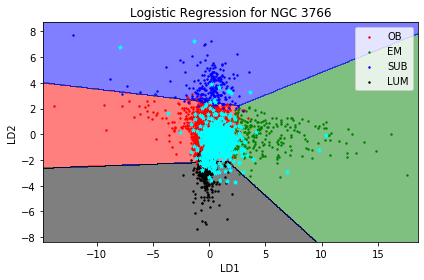

In [0]:
# Visualising the Training set results

"""
LDA para la region de NGC 3766
"""

fig, ax= plt.subplots()
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.05),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.05))
ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue', 'black')))
ax.set_xlim(X1.min(), X1.max())
ax.set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    ax.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue', 'black'))(i), label = dic[str(int(j))], s=2.)

ax.set_title('Logistic Regression for NGC 3766')
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.legend()
 
ax.scatter(resul_10[['PC 1']], resul_10[['PC 2']], s=15., color='cyan', marker=(5, 1), label= 'NGC 3766')
#ax.legend(prop={'size': 10}, numpoints=1, framealpha=0.5, 
#           bbox_to_anchor=(0., 1.01, 1., .102), 
#           loc=3, ncol=3, mode="expand", borderaxespad=0)

fig.tight_layout() # para una mejor salida
plt.savefig(archivo_test_10 + '-LDA.pdf')
plt.savefig(archivo_test_10 + '-LDA.jpg')
plt.show()
